In [1]:
import os
module_path = os.path.abspath(os.path.join('..'))
#ONLY RUN ONCE!
os.chdir(module_path)

In [2]:
from agent_components.wholesale.mdp import *

/home/pascalwhoop/Documents/Code/University/powerTAC/python-agent/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
env = PowerTacLogsMDPEnvironment()
env.reset()

In [4]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

In [12]:
ws_data = [row[3:] for row in env.wholesale_data]
ws_data = np.array(ws_data)

In [13]:
volume = ws_data[:,:,0]
price = ws_data[:,:,1]

In [14]:
price.shape

(1519, 24)

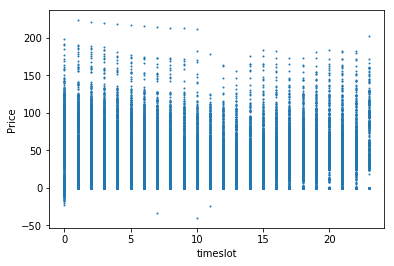

In [15]:
price_prep = np.zeros((price.shape[0] * price.shape[1], 2))
price_prep[:,0] = price.flatten()
price_prep[:,1] = np.array(list(range(price.shape[1]))*price.shape[0]).transpose()
df = pd.DataFrame(price_prep, columns=['Price', 'timeslot'])
df.plot.scatter(x='timeslot', y='Price', s=1)

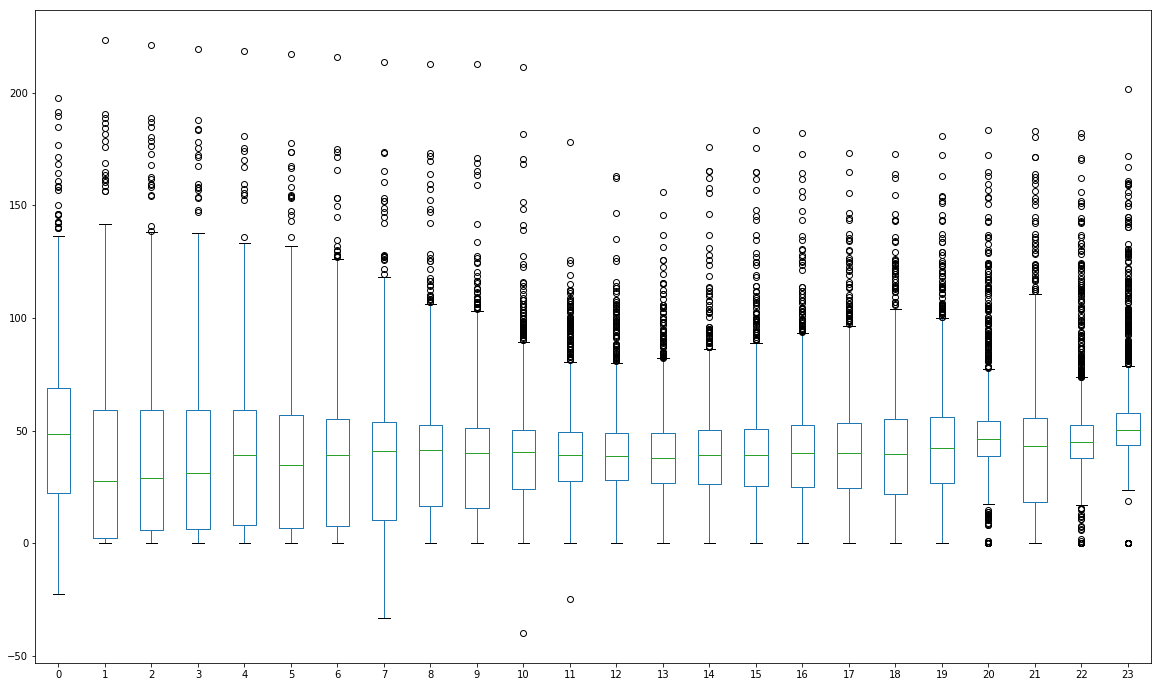

In [16]:

#df = pd.DataFrame(preprocessing.normalize(price))
df = pd.DataFrame(price)
df.plot.box(figsize=(20,12))

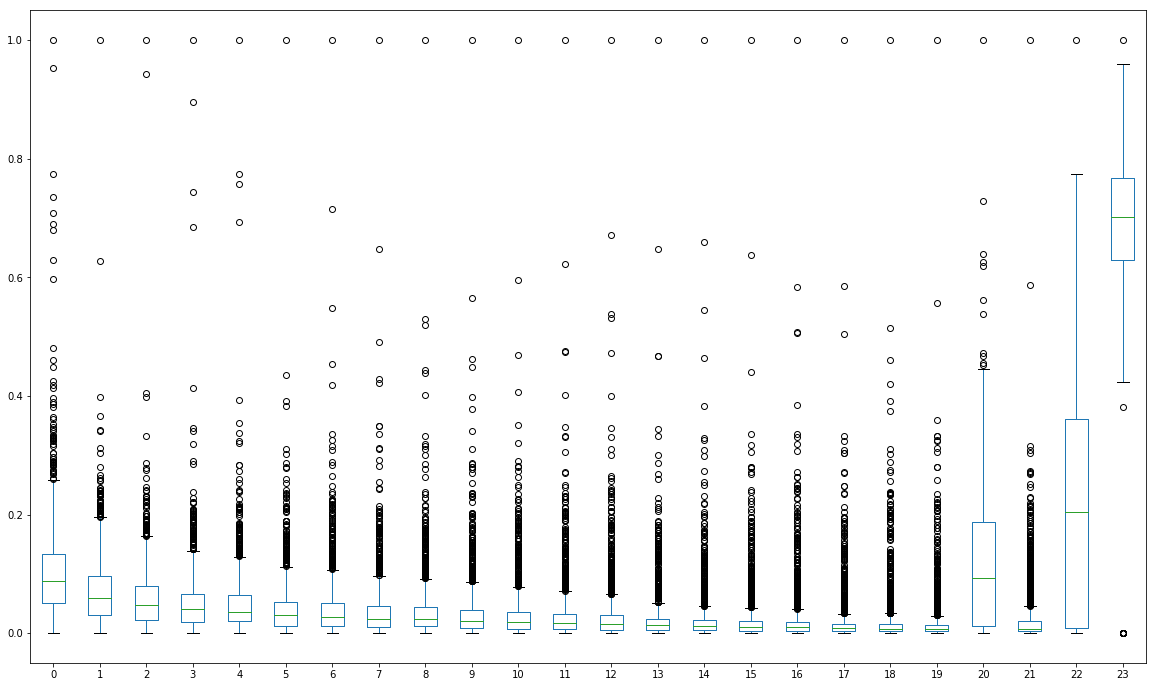

In [17]:
#df = pd.DataFrame(preprocessing.normalize(price))
df = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(volume))
df.plot.box(figsize=(20,12))

## getting price averages over 50 games

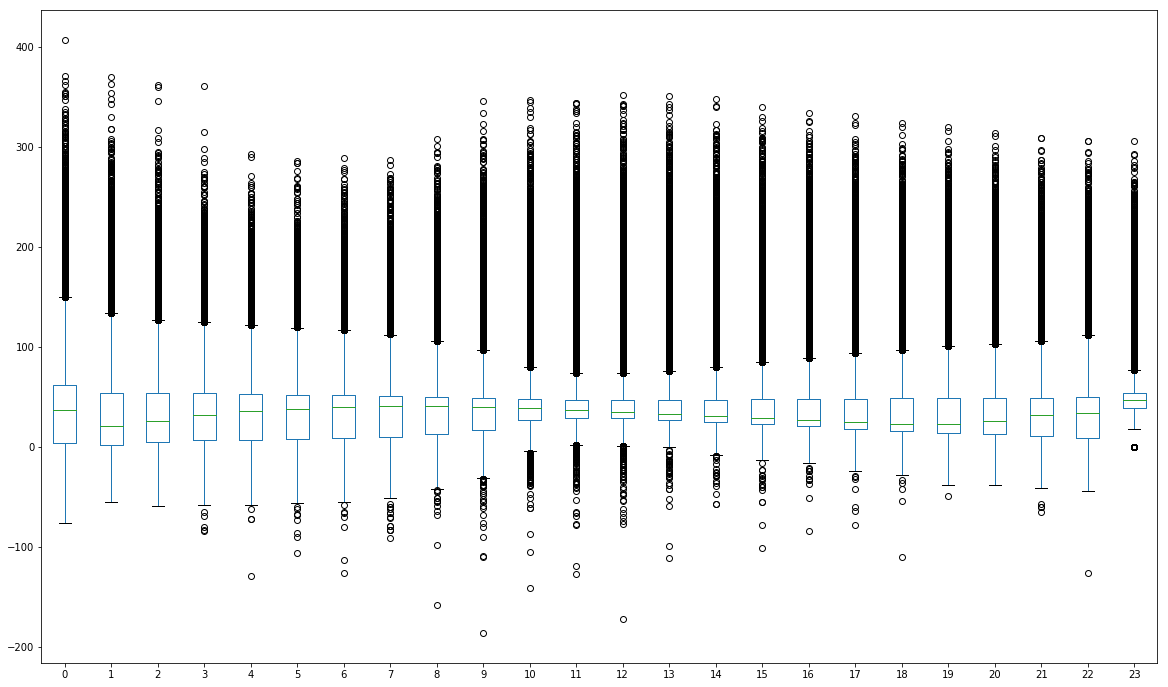

In [18]:
# getting the price averages over many games

prices_many = []
for i in range(50):
    env.reset()
    ws_data = [row[3:] for row in env.wholesale_data]
    ws_data = np.array(ws_data)
    volume = ws_data[:,:,0]
    price = ws_data[:,:,1]
    prices_many.extend(price)
#df = pd.DataFrame(preprocessing.normalize(price))
df = pd.DataFrame(prices_many)
df.plot.box(figsize=(20,12))